## Definitions of ML

**Machine learning** is a set of methods that can automatically detect patterns in data and use those patterns to make predictions (Murphy)

**Machine learning** is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks (Wikipedia)

**Machine learning** is an application of AI that enables systems to learn and improve from experience without being explicitly programmed

![](./images/ML_trends.png)

## Applications of ML

### Image recognition

<img src="https://www.perficient.com/-/media/images/insights/hero-images/research_image-recognition-accuracy-study_hero.ashx?h=931&iar=0&w=1400&hash=E0AED7417F234D3C66F9037149BB7612" style="height: 450px">

## Recommendation systems

<img src="https://vitalflux.com/wp-content/uploads/2022/08/collaborative-filtering-recommender-system.png" style="height: 450px">

<img src="https://vitalflux.com/wp-content/uploads/2021/10/sentiment-analysis-machine-learning-techniques.png" style="height: 550px">

### Fraud detection

<img src="https://thejournal.cii.co.uk/sites/default/files/2021-08/web_Fraud-concept_credit_Tanya%20Antusenok_shutterstock_1852581952.png" style="height: 400px; float:left">

<img src="https://www.spcdn.org/images/spam-filter1.jpg" style="height: 350px; float:right">

<img src="https://ehlion.com/wp-content/uploads/2020/10/Machine-Translation.jpg" style="height: 550px">

### Robotics

<img src="https://www.bostondynamics.com/sites/default/files/styles/advanced_technology/public/2020-10/spot-core-new2x.png?itok=jyCEl2-I" style="height: 450px">

### Playing games

<img src="https://c.files.bbci.co.uk/0D9B/production/_88738430_pic1go.jpg" style="height: 450px">

### Chat bots

<img src="https://sarrouf.co/wp-content/uploads/2022/12/OpenAI-ChatGPT.jpg" style="height: 450px">

## Supervised Learning

<img src="https://cdn-images-1.medium.com/max/1600/1*Iz7bCLrPTImnBDOOEyE3LA.png" style="height: 450px">


### Supervised learning notation

* training dataset $\mathcal D = \{(\boldsymbol x_i, y_i)\}_{i=1}^N$
* features $\boldsymbol x \in \mathcal X$ (usually $\mathcal X = \mathbb R^D$)
* targets (labels) $y_i \in \mathcal Y$
* the goal of the supervised learning is to find a mapping $f\colon \mathcal X \to \mathcal Y$ which would minimize the **cost** (**loss**) **function** 
$$\mathcal L = \frac 1N \sum\limits_{i=1}^N \ell(y_i, f(\boldsymbol x_i))$$

### Predictive model

The mapping $f_{\boldsymbol \theta}\colon \mathcal X \to \mathcal Y$ is usually taken from some parametric family 
$$
\mathcal F = \{f_{\boldsymbol \theta}(\boldsymbol x) \vert \boldsymbol \theta \in \mathbb R^n\}
$$
which is also called a **model**

To **fit** a model means to find $\boldsymbol \theta$ which minimizes the loss function
$$
    \mathcal L(\boldsymbol \theta) = \frac 1N \sum\limits_{i=1}^N \ell(y_i, f_{\boldsymbol \theta}(\boldsymbol x_i))
$$

## Classification

### Binary classification

<img src="https://miro.medium.com/max/1400/1*biZq-ihFzq1I6Ssjz7UtdA.jpeg" style="height: 450px">

**Binary classification**
* $\mathcal Y = \{0, 1\}$ or $\mathcal Y = \{-1, +1\}$
* loss = **misclassification rate** $\mathcal L(\boldsymbol \theta) = \frac 1N \sum\limits_{i=1}^N \big[y_i \ne f_{\boldsymbol \theta}(\boldsymbol x_i)\big]$
* this loss is not a smooth function, that's why they often predict the probability of class 1 $\hat y_i = f_{\boldsymbol \theta}(\boldsymbol x_i)$ and use **cross-entropy loss**
$$
\mathcal L(\boldsymbol \theta) = \frac 1N \sum\limits_{i=1}^N \big(y_i \log(\hat y_i) + (1-y_i) \log(1 - \hat y_i)\big)
$$

### Multiclass classification

<img src="https://miro.medium.com/max/1400/1*JAXmOAImcf683aXaBDPPVg.jpeg" style="height: 450px">

**Multilabel classification**
* $\mathcal Y = \{1, 2, \ldots, K\}$ 
* one-hot encoding: $\boldsymbol y_i \in \{0, 1\}^K$, $\sum\limits_{k=1}^K y_{ik} = 1$
* $\hat{\boldsymbol y}_i = f_{\boldsymbol \theta}(\boldsymbol x_i) \in [0, 1]^K$ is now the vector of probabilities of belonging to class k: $\hat y_{ik} = \mathbb P(\boldsymbol x_i \in \text{ class }k)$
* the cross-entropy loss is written now as follows:
$$
\mathcal L(\boldsymbol \theta) = \frac 1N \sum\limits_{i=1}^N \sum\limits_{k=1}^Ky_{ik} \log(\hat y_{ik})
$$

## Regression

* $\mathcal Y = \mathbb R$ or $\mathcal Y = \mathbb R^n$
* the common choice is the quadratic loss 
$$
\ell_2(y, \hat y) = (y - \hat y)^2
$$
* then the overall loss function — mean squared error:
$$
    \mathcal L(\boldsymbol \theta) = \mathrm{MSE}(\boldsymbol \theta) = \frac 1N\sum\limits_{i=1}^N (y_i - f_{\boldsymbol \theta}(\boldsymbol x_i))^2
$$

### Linear regression

If the function $f_{\boldsymbol \theta}(\boldsymbol x_i) = \boldsymbol \theta^T\boldsymbol x_i + b$ is linear, then the model is called **linear regression**

The parameter (**weight**) $\boldsymbol \theta$ can be found analytically

## Logistic regression

Used for binary classification, not for regression tasks!

How to convert $\hat y_i = f_{\boldsymbol \theta}(\boldsymbol x_i) = \boldsymbol \theta^T\boldsymbol x_i + b$ into the probability of class 1?

Easy-peasy: take the sigmoid function $\sigma(t) = \frac 1{1+e^{-t}}$

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import rc
from scipy.special import expit

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

font = {'family' : 'monospace',
        'size'   : 24,
        'weight' : 'heavy'
       }

rc('font', **font)

%config InlineBackend.figure_formats = ['svg']

def plot_sigmoid(xmin, xmax, ymin, ymax):
    text_size = 24
    legend_size = 20
    eps=0.2
    fig, ax = plt.subplots(figsize=(11, 6))
    xs = np.linspace(xmin, xmax, num=500)
    
    
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

    ax.text(xmax + eps, -.2, r"$x$", size=text_size)
    ax.text(0.1, ymax, r"$y$", size=text_size)
    
    arrow_fmt = dict(markersize=6, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    
    ax.plot(xs, expit(xs), c='r', lw=3, label= r'$\sigma(x) = \frac{1}{1+e^{-x}}$')
    # plt.plot(xs, np.maximum(0.2*xs, xs), c='m', lw=3, label= r'$\mathrm{LReLU}(x)$')
    
    ax.plot([0, xmax], [1, 1], c='k', ls='--', lw=2)
    ax.plot([xmin, 0], [-1, -1], c='k', ls='--', lw=2)
    
    ax.text(-0.18, 0.05, r"0")
    
    ax.legend(fontsize=legend_size);
    ax.grid(ls=':')
    ax.set_xlim(xmin-eps, xmax+eps)
    ax.set_ylim(ymin - eps/2, ymax+eps/2)
    yticks = np.arange(ymin, ymax+1)
    xticks = np.arange(xmin, xmax+1)
    ax.set_yticks(yticks[yticks != 0]);
    ax.set_xticks(xticks[xticks != 0])
    ax.set_yticklabels(yticks[yticks != 0], size=legend_size)
    ax.set_xticklabels(xticks[xticks != 0], size=legend_size);

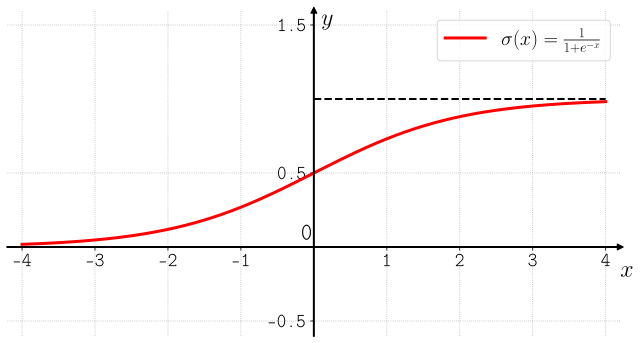

In [13]:
plot_sigmoid(-4, 4, -0.5, 1.5)

<img src="https://cdn-images-1.medium.com/max/1440/1*YUl_BcqFPgX49sSb5yrk3A.jpeg" style="height: 550px">

No targets anymore! The training dataset $\mathcal D = (\boldsymbol x_i)_{i=1}^N$

Examples of unsupervised learning tasks:
* clustering
* dimension reduction
* discovering latent factors
* searching for association rules

## Semisupervised learning

<img src="https://cdn-images-1.medium.com/max/1600/1*0TUC4m6yB7HUuPNO2SXEBw.png" style="height: 450px">

## Underfitting & Overfitting

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" style="height: 500px">

<img src="https://vitalflux.com/wp-content/uploads/2020/12/overfitting-and-underfitting-wrt-model-error-vs-complexity.png" style="height: 550px">

### Train and test

* training dataset $\mathcal D_{\mathrm{train}} = (\boldsymbol X_{\mathrm{train}}, \boldsymbol y_{\mathrm{train}})$ is used on learning stage:
$$
    \mathcal L_{\mathrm{train}}(\boldsymbol \theta) = \frac 1{N_{\mathrm{train}}}\sum\limits_{(\boldsymbol x_i, y_i) \in \mathcal D_{\mathrm{train}}} \ell(y_i, f_{\boldsymbol \theta}(\boldsymbol x_i)) \to \min\limits_{\boldsymbol \theta}
$$

* test dataset $\mathcal D_{\mathrm{test}} = (\boldsymbol X_{\mathrm{test}}, \boldsymbol y_{\mathrm{test}})$ used for evlaluation of model's quality:
$$
    \mathcal L_{\mathrm{test}}(\boldsymbol \theta) = \frac 1{N_{\mathrm{test}}}\sum\limits_{(\boldsymbol x_i, y_i) \in \mathcal D_{\mathrm{test}}} \ell(y_i, f_{\boldsymbol \theta}(\boldsymbol x_i))
$$

### A classical example

* Ground truth: $y(x) = \frac 1{1 + 25x^2}$, $-2\leqslant x \leqslant 2$
* Polynomial regression model: $f_{\boldsymbol \theta}(x) = \sum\limits_{k=0}^n \theta_k x^k$
* Training set: $X^{\ell} = \Big\{x_i = 4\frac{i-1}{\ell-1} - 2\Big\}_{i=1}^\ell$
* Test set: $\tilde X^{\ell} = \Big\{\tilde x_i = 4\frac{i-0.5}{\ell-1} - 2\Big\}_{i=1}^{\ell-1}$

* Loss function — MSE: 
$$
\mathcal L_{\mathrm{train}}(\boldsymbol \theta, X^{\ell}) = \frac 1\ell \sum\limits_{i=1}^\ell (f_{\boldsymbol \theta}(x_i) - y_i)^2  \to \min\limits_{\boldsymbol \theta}
$$
* What is happening with test loss
$$
\mathcal L_{\mathrm{test}}(\boldsymbol \theta, \tilde X^{\ell}) = \frac 1\ell \sum\limits_{i=1}^\ell (f_{\boldsymbol \theta}(\tilde x_i) - \tilde y_i)^2
$$
as $n$ grows?

In [21]:
def y(x):
    return 1./(1 + 25*x**2)

def plot_runge_train(l):
    plt.figure(figsize=(11, 6))
    xs = np.linspace(-2, 2, num=500)
    plt.plot(xs, y(xs), lw=2, c='r', label=r"$y=\frac 1{1+25x^2}$")
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    plt.scatter(train, y(train), c='b', label="train")
    plt.scatter(test, y(test), c='w', edgecolor='b', linewidth=1.5, label="test")
    plt.title(r"$\ell = {}$".format(l))
    plt.legend()
    plt.grid(ls=':')

from sklearn.linear_model import LinearRegression

def X(x, n):
    res = [np.ones_like(x)]
    for i in range(1, n+1):
        res.append(x**i)
    return np.vstack(res).T

def plot_runge_model(l, n):
    plt.figure(figsize=(11, 6))
    xs = np.linspace(-2, 2, num=500)
    plt.plot(xs, y(xs), lw=2, c='r', ls="--", label=r"$y=\frac 1{1+25x^2}$")
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    plt.scatter(train, y(train), c='b', label="train")
    plt.scatter(test, y(test), c='w', edgecolor='b', linewidth=1.5, label="test")
    
    X_train = X(train, n)
    X_test = X(test, n)
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(X_train, y(X_train))
    ys = lin_reg.predict(X(xs, n))
    plt.plot(xs, ys[:, 1], c='g', lw=2, label=r"$f_\theta(x)$")
    plt.legend()
    plt.title(r"$\ell = {}, n={}$".format(l, n))
    plt.grid(ls=':')
    
def plot_runge_scores(l, ns):
    plt.figure(figsize=(11, 6))
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    train_score, test_score = [], []
    for n in ns:
        X_train = X(train, n)
        X_test = X(test, n)
        lin_reg = LinearRegression(fit_intercept=False)
        lin_reg.fit(X_train, y(X_train))
        train_score.append(np.mean((lin_reg.predict(X_train) - y(X_train))**2))
        test_score.append(np.mean((lin_reg.predict(X_test) - y(X_test))**2))
        
    plt.semilogy(ns, train_score, c='r', lw=2, label=r"train loss")
    plt.semilogy(ns, test_score, c='b', lw=2, label=r"test loss")
    plt.xlim(ns[0], ns[-1])
    plt.xlabel(r"$n$")
    plt.ylabel(r"$\mathcal L$")
    plt.legend()
    plt.title(r"Scores, $\ell={}$".format(l))
    plt.grid(ls=':')

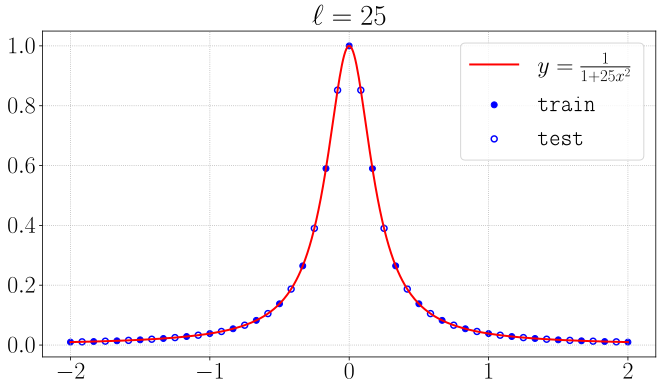

In [22]:
plot_runge_train(25)

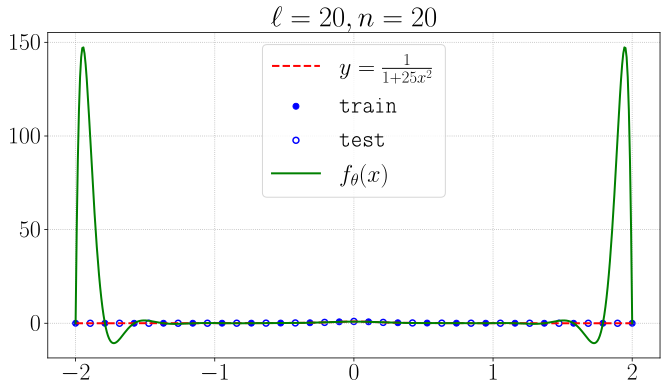

In [34]:
plot_runge_model(20, 20)

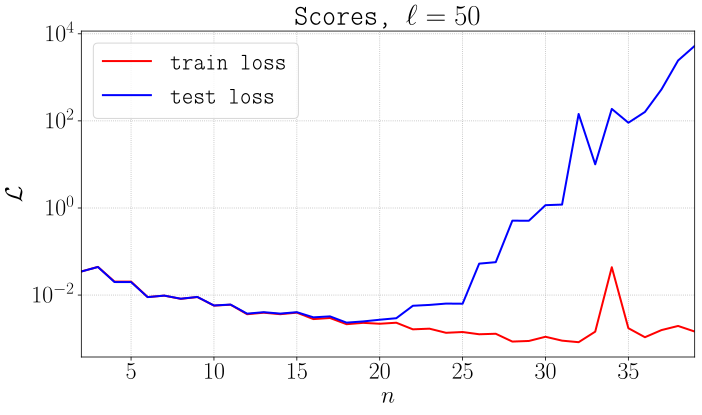

In [35]:
plot_runge_scores(50, np.arange(2, 40))

The overfitting is a big problem in ML because an overfitted model makes poor predictions

The first signal of the overfitting: $\mathcal L_{\mathrm{train}} \ll \mathcal L_{\mathrm{test}}$

## Cross validation

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" style="height: 550px">
